In [1]:
import torch
from transformers import BertTokenizer, BertModel
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# 모델과 토크나이저 로드
tokenizer = BertTokenizer.from_pretrained('bert-base-multilingual-cased')
model = BertModel.from_pretrained('bert-base-multilingual-cased', output_attentions=True)

tokenizer_config.json:   0%|          | 0.00/49.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/625 [00:00<?, ?B/s]

/Users/juwonkim/anaconda3/lib/python3.11/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


model.safetensors:   0%|          | 0.00/714M [00:00<?, ?B/s]

A parameter name that contains `beta` will be renamed internally to `bias`. Please use a different name to suppress this warning.
A parameter name that contains `gamma` will be renamed internally to `weight`. Please use a different name to suppress this warning.
A parameter name that contains `beta` will be renamed internally to `bias`. Please use a different name to suppress this warning.
A parameter name that contains `gamma` will be renamed internally to `weight`. Please use a different name to suppress this warning.
A parameter name that contains `beta` will be renamed internally to `bias`. Please use a different name to suppress this warning.
A parameter name that contains `gamma` will be renamed internally to `weight`. Please use a different name to suppress this warning.
A parameter name that contains `beta` will be renamed internally to `bias`. Please use a different name to suppress this warning.
A parameter name that contains `gamma` will be renamed internally to `weight`. Pl

In [3]:
texts = [
    "1c타입고속충전케이블",
    "1강화유리필름",
    "1강화유리필름풀커버강화유리전기종액정보호필름",
    "1등급준특수삼각살보석살1등급차돌",
    "1등급한우국거리불고기"
]


In [4]:
def get_attention_scores(text):
    # 입력을 토크나이저로 토큰화하고 텐서로 변환
    inputs = tokenizer(text, return_tensors='pt', padding=True, truncation=True)
    
    # 모델을 사용하여 입력의 어텐션 스코어를 얻음
    outputs = model(**inputs)
    
    # 어텐션 스코어를 가져옴
    attentions = outputs.attentions  # (layer, batch, head, seq_len, seq_len)
    
    # 첫 번째 문장에 대한 어텐션 스코어
    attention_scores = attentions[-1][0]  # 마지막 레이어, 첫 번째 배치
    return attention_scores, inputs['input_ids']

In [5]:
# 테스트를 위한 첫 번째 텍스트
text = texts[0]
attention_scores, input_ids = get_attention_scores(text)

# 어텐션 스코어의 형태 (heads, tokens, tokens)
print(f"어텐션 스코어 shape: {attention_scores.shape}")

# 토큰 ID를 실제 토큰으로 변환
tokens = tokenizer.convert_ids_to_tokens(input_ids[0])

어텐션 스코어 shape: torch.Size([12, 13, 13])


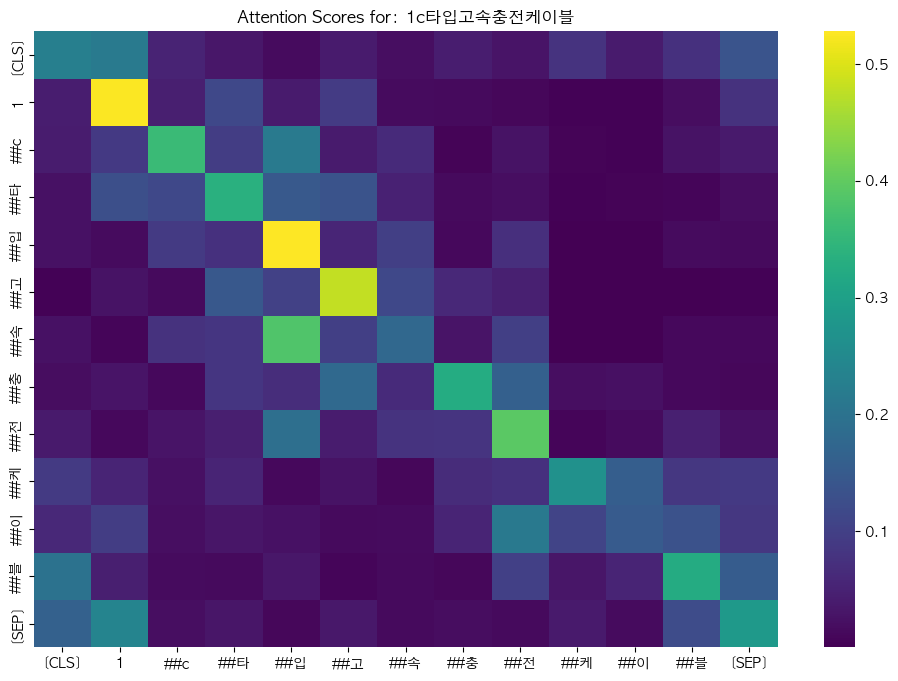

In [7]:
plt.rcParams['font.family'] = 'AppleGothic'
# 첫 번째 헤드에 대한 어텐션 스코어 시각화
fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(attention_scores[0].detach().numpy(), xticklabels=tokens, yticklabels=tokens, cmap='viridis', ax=ax)
ax.set_title(f"Attention Scores for: {text}")
plt.show()
